In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

In [2]:
df = pd.read_csv("../Final/df_final.csv")

C:\Users\Dell\anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(5)

,crash_date,borough,zip code,latitude,longitude,location,collision_id,injured,deaths_number,vehicle,main_contributing_factor,road_type,crash_time,time_of_day,weekday,season,deaths
0,2021-12-14,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",4486519,0,0,Passenger vehicle,Passing Too Closely,avenue,14:58:00,day,Tuesday,Winter,0
1,2021-12-14,QUEENS,11413,40.675884,-73.755770,"(40.675884, -73.75577)",4487127,0,0,Passenger vehicle,Turning Improperly,boulevard,16:50:00,day,Tuesday,Winter,0
2,2021-12-14,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",4486635,4,0,Passenger vehicle,Other,avenue,23:10:00,night,Tuesday,Winter,0
3,2021-12-14,BROOKLYN,11211,40.710957,-73.951126,"(40.710957, -73.951126)",4486556,2,0,Bus,Passing or Lane Usage Improper,street,17:15:00,day,Tuesday,Winter,0
4,2022-04-24,BRONX,10466,40.894810,-73.861830,"(40.89481, -73.86183)",4521633,0,0,Passenger vehicle,Driver Inattention/Distraction,way,17:45:00,day,Sunday,Spring,0


In [4]:
categoricas= ["borough", "vehicle", "road_type", "time_of_day", "weekday", "season", "main_contributing_factor"]
x=df[categoricas]
y=df["deaths"]

In [5]:
df.deaths.value_counts()

0    438294
1       634
Name: deaths, dtype: int64

In [6]:
x=pd.get_dummies(x, drop_first = True)
x

,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,vehicle_Bus,vehicle_Large commercial vehicle,vehicle_Motorcycle,vehicle_Other,vehicle_Passenger vehicle,vehicle_SUV,...,main_contributing_factor_Following Too Closely,main_contributing_factor_Lost Consciousness,main_contributing_factor_Other,main_contributing_factor_Passing Too Closely,main_contributing_factor_Passing or Lane Usage Improper,main_contributing_factor_Pavement Slippery,main_contributing_factor_Traffic Control Disregarded,main_contributing_factor_Turning Improperly,main_contributing_factor_Unsafe Lane Changing,main_contributing_factor_Unsafe Speed
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438923,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438924,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
438925,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
438926,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Naive bayes bernoulli + Gridsearch + oversampling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=114, shuffle=False)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy=1);

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

# setup grid search
grid_nb = GridSearchCV(estimator = BernoulliNB(binarize = None), param_grid = alphas, cv = folds, scoring = 'recall')

# fit nb
grid_nb.fit(X_train_os, y_train_os)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=BernoulliNB(binarize=None),
             param_grid={'alpha': [1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                   2.0, 10.0]},
             scoring='recall')

In [57]:
grid_nb.best_estimator_

BernoulliNB(alpha=1e-10, binarize=None)

In [58]:
grid_nb.best_score_

0.7464541229766416

In [59]:
modelo=BernoulliNB(alpha=10, binarize=None, class_prior=None, fit_prior=True)

In [60]:
modelo.fit(X_train_os, y_train_os)

BernoulliNB(alpha=10, binarize=None)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_train_pred_grid = modelo.predict(X_train_os)
y_test_pred_grid = modelo.predict(X_test)
print(accuracy_score(y_train_os, y_train_pred_grid))
print(accuracy_score(y_test, y_test_pred_grid))

0.742597933627834
0.685506506761929


In [62]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_pred_grid))

0.6409395973154363


In [69]:
accuracy_grid=accuracy_score(y_test, y_test_pred_grid)
accuracy_grid

0.685506506761929

In [70]:
print(f1_score(y_test, y_test_pred_grid))

0.005504164145125501


In [71]:
print(precision_score(y_test, y_test_pred_grid))

0.002763949988423246


In [63]:
conf_mat_grid = confusion_matrix(y_test, y_test_pred_grid)
conf_mat_grid

array([[150253,  68913],
       [   107,    191]], dtype=int64)

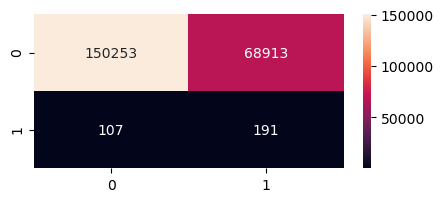

In [68]:
plt.figure(figsize=(5, 2)); sns.heatmap(conf_mat_grid,  annot=True, fmt="d");

In [65]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_test_pred_grid)
roc_auc = auc(fpr, tpr)
roc_auc

0.6632533508510328

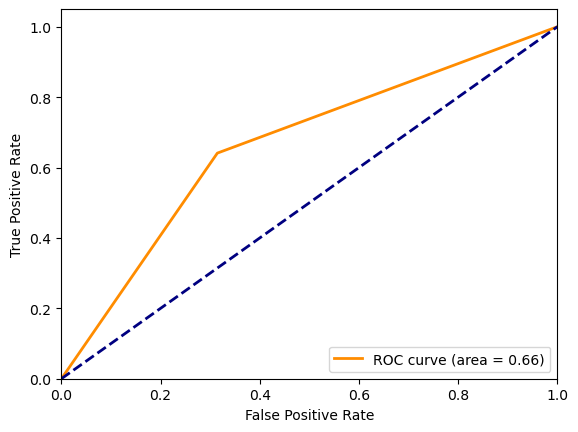

In [67]:
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.show()